In [1]:
import pandas as pd

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import torch
import numpy as np
import pickle as pk

from tqdm import tqdm_notebook
from sklearn.metrics import cohen_kappa_score
from fastai.vision import *
from torch.nn import functional as F
from utils import *

/home/user02/anaconda3/envs/py36/lib/python3.6/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [2]:
current_time = '1202_14-10-24'  # get_BJ_time()
print(current_time)

1202_14-10-24


In [3]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
SEED = 2019
seed_everything(SEED)

deployment_dir = "../output/inference"

def qk(y_pred, y):
    k = torch.tensor(cohen_kappa_score(torch.round(y_pred), y, weights='quadratic'), device='cuda:0')
    k[k != k] = 0
    k[torch.isinf(k)] = 0
    
    return k

In [4]:
df_2019_cv = pd.read_csv('../input/aptos-data-split/df_2019_cv.csv')  # 训练集与验证集
test_df = pd.read_csv('../input/aptos2019-blindness-detection/sample_submission.csv')  # 测试集

# Feature Extraction

## Train logits

验证集上预测结果

### b3

In [5]:
b3_models = ["efficientnet-b3_1202_14-10-24_stage2_f1", 
             "efficientnet-b3_1202_14-10-24_stage2_f2",
             "efficientnet-b3_1202_14-10-24_stage2_f3", 
             "efficientnet-b3_1202_14-10-24_stage2_f4",
             "efficientnet-b3_1202_14-10-24_stage2_f5"]

b3_train_logits_list = []

for i, m in enumerate(b3_models):
    fold = i + 1
    learn = load_learner(deployment_dir, "{}.pkl".format(m))
    val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]
    learn.data.add_test(ImageList.from_df(val_df,
                                          '../input/aptos2019-blindness-detection',
                                          cols="id_code",
                                          folder='train_images_ben_preprocessing_sigmaX10',
                                          suffix='.png'))

    logits,_ = learn.get_preds(DatasetType.Test)
    logits = logits.numpy()
    b3_train_logits_list.append(logits)
    np.save("../output/stacking/{}_logits.npy".format(m), logits)

    print("import {}.pkl".format(m), logits.shape)

import efficientnet-b3_1202_14-10-24_stage2_f1.pkl


(733, 1)
import efficientnet-b3_1202_14-10-24_stage2_f2.pkl


(733, 1)
import efficientnet-b3_1202_14-10-24_stage2_f3.pkl


(733, 1)
import efficientnet-b3_1202_14-10-24_stage2_f4.pkl


(732, 1)
import efficientnet-b3_1202_14-10-24_stage2_f5.pkl


(731, 1)


### b4

In [6]:
b4_models = ["efficientnet-b4_1202_14-10-24_stage2_f1", 
             "efficientnet-b4_1202_14-10-24_stage2_f2",
             "efficientnet-b4_1202_14-10-24_stage2_f3", 
             "efficientnet-b4_1202_14-10-24_stage2_f4",
             "efficientnet-b4_1202_14-10-24_stage2_f5"]

b4_train_logits_list = []

for i, m in enumerate(b4_models):
    fold = i + 1
    learn = load_learner(deployment_dir, "{}.pkl".format(m))
    val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]
    learn.data.add_test(ImageList.from_df(val_df,
                                          '../input/aptos2019-blindness-detection',
                                          cols="id_code",
                                          folder='train_images_ben_preprocessing_sigmaX10',
                                          suffix='.png'))

    logits,_ = learn.get_preds(DatasetType.Test)
    logits = logits.numpy()
    b4_train_logits_list.append(logits)
    np.save("../output/stacking/{}_logits.npy".format(m), logits)

    print("import {}.pkl".format(m), logits.shape)

import efficientnet-b4_1202_14-10-24_stage2_f1.pkl (733, 1)


import efficientnet-b4_1202_14-10-24_stage2_f2.pkl (733, 1)


import efficientnet-b4_1202_14-10-24_stage2_f3.pkl (733, 1)


import efficientnet-b4_1202_14-10-24_stage2_f4.pkl (732, 1)


import efficientnet-b4_1202_14-10-24_stage2_f5.pkl (731, 1)


### b5

In [7]:
b5_models = ["efficientnet-b5_1202_14-10-24_stage2_f1", 
             "efficientnet-b5_1202_14-10-24_stage2_f2",
             "efficientnet-b5_1202_14-10-24_stage2_f3", 
             "efficientnet-b5_1202_14-10-24_stage2_f4",
             "efficientnet-b5_1202_14-10-24_stage2_f5"]

b5_train_logits_list = []

for i, m in enumerate(b5_models):
    fold = i + 1
    learn = load_learner(deployment_dir, "{}.pkl".format(m))
    val_df = df_2019_cv[df_2019_cv["is_valid{}".format(fold)]]
    learn.data.add_test(ImageList.from_df(val_df,
                                          '../input/aptos2019-blindness-detection',
                                          cols="id_code",
                                          folder='train_images_ben_preprocessing_sigmaX10',
                                          suffix='.png'))

    logits,_ = learn.get_preds(DatasetType.Test)
    logits = logits.numpy()
    b5_train_logits_list.append(logits)
    np.save("../output/stacking/{}_logits.npy".format(m), logits)

    print("import {}.pkl".format(m), logits.shape)

import efficientnet-b5_1202_14-10-24_stage2_f1.pkl (733, 1)


import efficientnet-b5_1202_14-10-24_stage2_f2.pkl (733, 1)


import efficientnet-b5_1202_14-10-24_stage2_f3.pkl (733, 1)


import efficientnet-b5_1202_14-10-24_stage2_f4.pkl (732, 1)


import efficientnet-b5_1202_14-10-24_stage2_f5.pkl (731, 1)


## Test Feature

### Average

#### b3

In [8]:
b3_test_logits_list = []
for m in b3_models:
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

    logits,_ = learn.get_preds(DatasetType.Test)
    logits = logits.numpy()
    b3_test_logits_list.append(logits)
    
    np.save("../output/stacking/{}_logits_test.npy".format(m), logits)
    
    print("import {}.pkl".format(m), logits.shape)

import efficientnet-b3_1202_14-10-24_stage2_f1.pkl (1928, 1)


import efficientnet-b3_1202_14-10-24_stage2_f2.pkl (1928, 1)


import efficientnet-b3_1202_14-10-24_stage2_f3.pkl (1928, 1)


import efficientnet-b3_1202_14-10-24_stage2_f4.pkl (1928, 1)


import efficientnet-b3_1202_14-10-24_stage2_f5.pkl (1928, 1)


#### b4

In [9]:
b4_test_logits_list = []
for m in b4_models:
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))

    logits,_ = learn.get_preds(DatasetType.Test)
    logits = logits.numpy()
    b4_test_logits_list.append(logits)
    
    np.save("../output/stacking/{}_logits_test.npy".format(m), logits)
    
    print("import {}.pkl".format(m), logits.shape)

import efficientnet-b4_1202_14-10-24_stage2_f1.pkl (1928, 1)


import efficientnet-b4_1202_14-10-24_stage2_f2.pkl (1928, 1)


import efficientnet-b4_1202_14-10-24_stage2_f3.pkl (1928, 1)


import efficientnet-b4_1202_14-10-24_stage2_f4.pkl (1928, 1)


import efficientnet-b4_1202_14-10-24_stage2_f5.pkl (1928, 1)


#### b5

In [10]:
b5_test_logits_list = []
for m in b5_models:
    learn = load_learner(deployment_dir, "{}.pkl".format(m))

    learn.data.add_test(ImageList.from_df(test_df,
                                      '../input/aptos2019-blindness-detection',
                                      folder='test_images_ben_preprocessing_sigmaX10',
                                      suffix='.png'))
    logits,_ = learn.get_preds(DatasetType.Test)
    logits = logits.numpy()
    b5_test_logits_list.append(logits)
    
    np.save("../output/stacking/{}_logits_test.npy".format(m), logits)
    
    print("import {}.pkl".format(m), logits.shape)

import efficientnet-b5_1202_14-10-24_stage2_f1.pkl (1928, 1)


import efficientnet-b5_1202_14-10-24_stage2_f2.pkl (1928, 1)


import efficientnet-b5_1202_14-10-24_stage2_f3.pkl (1928, 1)


import efficientnet-b5_1202_14-10-24_stage2_f4.pkl (1928, 1)


import efficientnet-b5_1202_14-10-24_stage2_f5.pkl (1928, 1)


# Train Stage 2 model on OOF

在折外数据集中，训练阶段二模型

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [6]:
def qk_np(y, y_pred):
    k = cohen_kappa_score(np.round(y_pred), y, weights='quadratic')
    
    return k

score = make_scorer(qk_np, greater_is_better=True)

In [8]:
b3_models = ["efficientnet-b3_1202_14-10-24_stage2_f1", 
             "efficientnet-b3_1202_14-10-24_stage2_f2",
             "efficientnet-b3_1202_14-10-24_stage2_f3", 
             "efficientnet-b3_1202_14-10-24_stage2_f4",
             "efficientnet-b3_1202_14-10-24_stage2_f5"]
b4_models = ["efficientnet-b4_1202_14-10-24_stage2_f1", 
             "efficientnet-b4_1202_14-10-24_stage2_f2",
             "efficientnet-b4_1202_14-10-24_stage2_f3", 
             "efficientnet-b4_1202_14-10-24_stage2_f4",
             "efficientnet-b4_1202_14-10-24_stage2_f5"]
b5_models = ["efficientnet-b5_1202_14-10-24_stage2_f1", 
             "efficientnet-b5_1202_14-10-24_stage2_f2",
             "efficientnet-b5_1202_14-10-24_stage2_f3", 
             "efficientnet-b5_1202_14-10-24_stage2_f4",
             "efficientnet-b5_1202_14-10-24_stage2_f5"]

In [9]:
b3_train_logits_list = []
for m in b3_models:
    logits = np.load("../output/stacking/{}_logits.npy".format(m))
    b3_train_logits_list.append(logits)

    print(logits.shape)
    
b4_train_logits_list = []
for m in b4_models:
    logits = np.load("../output/stacking/{}_logits.npy".format(m))
    b4_train_logits_list.append(logits)

    print(logits.shape)

b5_train_logits_list = []
for m in b5_models:
    logits = np.load("../output/stacking/{}_logits.npy".format(m))
    b5_train_logits_list.append(logits)

    print(logits.shape)
    

(733, 1)
(733, 1)
(733, 1)
(732, 1)
(731, 1)
(733, 1)
(733, 1)
(733, 1)
(732, 1)
(731, 1)
(733, 1)
(733, 1)
(733, 1)
(732, 1)
(731, 1)


In [10]:
# 预测值
# 五折样本数量分别为 733 733 733 732 731，总计3662个
X_train = np.concatenate([np.concatenate(b3_train_logits_list, axis=0),
                         np.concatenate(b4_train_logits_list, axis=0),
                         np.concatenate(b5_train_logits_list, axis=0)], axis=1)

# 真值
y_train = []  # 3662个
n_fold = 5
for i in range(1, n_fold+1):
    label_t = df_2019_cv[df_2019_cv["is_valid{}".format(i)]]["diagnosis"].tolist()
    y_train += label_t
    
print(X_train.shape)

(3662, 3)


## LightGBM 

In [14]:
import lightgbm as lgb

In [17]:
estimator = lgb.LGBMRegressor(random_state=SEED)

param_grid = {
    'max_depth': [3, 5],  # 5 # 3 （# 原最优值  # 现最优值）
    'learning_rate': [0.01, 0.05, 0.1], # 0.05 # 0.1
    'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95], # 0.7 # 0.6
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],  # 0.7 # 0.95
    'bagging_freq': [5, 6, 8],  # 8 # 6
    'lambda_l1': [0, 0.1, 0.4],  # 0 # 0.4
    'lambda_l2': [0, 10, 15, 20], # 15 # 10
    'cat_smooth': [1, 10, 15], # 1 
}

# 参数组合 2*3*5*5*3*3*4*3=16200个，交叉验证5次，拟合16200*5=81000次，n_jobs=-1表示使用当前CPU所有40个线程处理器
gbm = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1, scoring=score, verbose=1)
gbm.fit(X_train, y_train)

Fitting 5 folds for each of 16200 candidates, totalling 81000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 2370 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 3120 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 3970 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 5970 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8370 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9720 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 11170 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 12720 tasks    

Best parameters found by grid search are: {'bagging_fraction': 0.95, 'bagging_freq': 6, 'cat_smooth': 1, 'feature_fraction': 0.6, 'lambda_l1': 0.4, 'lambda_l2': 10, 'learning_rate': 0.1, 'max_depth': 3}


In [18]:
print('Best parameters found by grid search are:', gbm.best_params_)
gbm.cv_results_;

{'mean_fit_time': array([0.249438, 0.255704, 0.208977, 0.223299, ..., 0.047918, 0.061456, 0.04472 , 0.064816]),
 'std_fit_time': array([0.019144, 0.017988, 0.016332, 0.016411, ..., 0.005586, 0.007017, 0.003175, 0.002694]),
 'mean_score_time': array([0.008562, 0.009258, 0.007869, 0.008614, ..., 0.004614, 0.004735, 0.004462, 0.005665]),
 'std_score_time': array([0.000616, 0.001346, 0.001169, 0.001405, ..., 0.001219, 0.000145, 0.000744, 0.00084 ]),
 'param_bagging_fraction': masked_array(data=[0.6, 0.6, 0.6, 0.6, ..., 0.95, 0.95, 0.95, 0.95],
              mask=[False, False, False, False, ..., False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_bagging_freq': masked_array(data=[5, 5, 5, 5, ..., 8, 8, 8, 8],
              mask=[False, False, False, False, ..., False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_cat_smooth': masked_array(data=[1, 1, 1, 1, ..., 15, 15, 15, 15],
              mask=[False, False, False,

In [19]:
# 打印最佳qk_np系数
print(gbm.best_score_, qk_np(y_train, gbm.predict(X_train)))  # 0.9249611533110217 0.9313491737992345

0.9249611533110217 0.9313491737992345


In [20]:
model_save_name = "lightgbm-{}".format(current_time)

with open(os.path.join(deployment_dir, model_save_name+".pkl"), "wb") as f:
    pk.dump(gbm.best_estimator_, f)

print(model_save_name)

lightgbm-1202_14-10-24


## XGBoost 

In [21]:
import xgboost as xgb

In [29]:
estimator_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED)  # n_jobs由8改为-1，速度提高了很多

parameters = {
              'max_depth': [3],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],  # 0.1  # 0.05
              'min_child_weight': [0, 2, 5, 10, 20],  # 20 # 20
              'max_delta_step': [0, 0.2, 0.6, 1, 2],  # 2 # 2
              'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],  # 0.8 # 0.8
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],  # 0.7 # 0.7
              'reg_alpha': [0, 0.25, 0.5, 0.75, 1],  # 0 # 0.75
              'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],  # 0.6 # 0.6
              'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]  # 0.8 # 1
}

# 参数组合 5^8 = 390625个，交叉验证5次，拟合390625*5=1953125次，n_jobs由16改为-1，使用全部40个CPU线程和40+1个GPU线程
# [Parallel(n_jobs=-1)]: Done 1953125 out of 1953125 | elapsed: 584.9min finished
xlf = GridSearchCV(estimator_xgb, parameters, cv=5, n_jobs=-1, scoring=score, verbose=1)
xlf.fit(X_train, y_train)

Fitting 5 folds for each of 390625 candidates, totalling 1953125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 2370 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 3120 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 3970 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 5970 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 7120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8370 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 9720 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 11170 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 12720 tasks    

[00:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters found by grid search are: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 20, 'reg_alpha': 0.75, 'reg_lambda': 0.6, 'scale_pos_weight': 1, 'subsample': 0.8}


In [30]:
print('Best parameters found by grid search are:', xlf.best_params_)
xlf.cv_results_;

{'mean_fit_time': array([3.383527, 4.704849, 5.226149, 5.270714, ..., 0.202664, 0.229875, 0.215248, 0.181259]),
 'std_fit_time': array([1.324906, 0.559911, 0.236649, 0.304628, ..., 0.019326, 0.029308, 0.036739, 0.011236]),
 'mean_score_time': array([0.004922, 0.007272, 0.007336, 0.009118, ..., 0.007536, 0.010139, 0.009276, 0.007687]),
 'std_score_time': array([0.000864, 0.003236, 0.001568, 0.003067, ..., 0.000618, 0.002985, 0.002436, 0.000805]),
 'param_colsample_bytree': masked_array(data=[0.5, 0.5, 0.5, 0.5, ..., 0.9, 0.9, 0.9, 0.9],
              mask=[False, False, False, False, ..., False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, ..., 0.15, 0.15, 0.15, 0.15],
              mask=[False, False, False, False, ..., False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_delta_step': masked_array(data=[0, 0, 0, 0, ..., 2, 2, 2, 2],
              mask=

In [31]:
print(xlf.best_score_, qk_np(y_train, xlf.predict(X_train)))  # 0.9247465204313651 0.9303037842489481

0.9247465204313651 0.9303037842489481


In [32]:
model_save_name = "xgboost-{}".format(current_time)

with open(os.path.join(deployment_dir, model_save_name+".pkl"), "wb") as f:
    pk.dump(xlf.best_estimator_, f)

print(model_save_name)

xgboost-1202_14-10-24


## SVR 

In [34]:
from sklearn.svm import SVR

In [35]:
# svr = SVR(gamma=0.0001, C=100)
estimator_svr = SVR()


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]  # {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

# 参数组合 2*4 + 4 = 12个，交叉验证5次，拟合12*5=60次，n_jobs由16改为-1表示使用当前CPU所有40个线程处理器
svr = GridSearchCV(estimator_svr, tuned_parameters, cv=5, n_jobs=-1, scoring=score, verbose=1)
svr.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  60 | elapsed:    3.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   48.3s finished


Best parameters found by grid search are: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [36]:
print('Best parameters found by grid search are:', svr.best_params_)
svr.cv_results_;

{'mean_fit_time': array([ 0.321469,  0.475819,  0.349002,  0.3453  ,  0.388806,  0.368826,  0.476112,  0.380447,  0.470999,  1.293979,
         5.915083, 42.890613]),
 'std_fit_time': array([0.04869 , 0.003281, 0.020026, 0.003458, 0.008441, 0.004636, 0.042105, 0.030168, 0.058965, 0.258347, 0.410513,
        1.32915 ]),
 'mean_score_time': array([0.057349, 0.075669, 0.056903, 0.056416, 0.052479, 0.058228, 0.031629, 0.040953, 0.014838, 0.010368, 0.011161,
        0.009885]),
 'std_score_time': array([0.002034, 0.001788, 0.002448, 0.002369, 0.008791, 0.002191, 0.002   , 0.011389, 0.003513, 0.000944, 0.001482,
        0.001216]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001, --, --, --, --],
           

In [37]:
print(svr.best_score_, qk_np(y_train, svr.predict(X_train))) # 原0.9255694040131046 0.9251493380866914

0.9184078242305607 0.9194220651679763


In [38]:
model_save_name = "svr-{}".format(current_time)

with open(os.path.join(deployment_dir, model_save_name+".pkl"), "wb") as f:
# with open(os.path.join(deployment_dir, "svr-0903_05-26-03.pkl"), "wb") as f:
    pk.dump(svr.best_estimator_, f)    
#     pk.dump(svr, f)

print(model_save_name)

svr-1202_14-10-24


## CatBoost

In [40]:
from catboost import CatBoostRegressor

In [41]:
estimator_cb = CatBoostRegressor(random_seed=SEED)

params = {
          'depth':[3,1,2,6,4,5],  # 2 # 2
          'iterations':[250,500,750,1000],  # 1000 # 250
          'learning_rate':[0.01,0.1,0.2,0.3],  # 0.01 # 0.1
          'l2_leaf_reg':[3,1,5,10],  # 3 # 5
          'border_count':[100,128, 200, 254, 300]  # 100 # 300
         }

# 参数组合 6*4*4*4*5=1920 个，交叉验证5次，拟合 1920*5=9600 次，n_jobs由16改为-1表示使用当前CPU所有40个线程处理器
# 训练了78.2min
cb = GridSearchCV(estimator_cb, params, cv=5, n_jobs=-1, scoring=score, verbose=1)
cb.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2370 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 3120 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 3970 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed: 39.5min
[Parallel(n_jobs=-1)]: Done 5970 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 7120 tasks      | elapsed: 56.9min
[Parallel(n_jobs=-1)]: Done 8370 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed: 78.2min finished


0:	learn: 1.1965739	total: 51.9ms	remaining: 12.9s
1:	learn: 1.1049221	total: 56ms	remaining: 6.94s
2:	learn: 1.0267871	total: 60.9ms	remaining: 5.02s
3:	learn: 0.9530220	total: 65.1ms	remaining: 4s
4:	learn: 0.8869089	total: 69.1ms	remaining: 3.38s
5:	learn: 0.8312752	total: 70.5ms	remaining: 2.87s
6:	learn: 0.7805321	total: 75ms	remaining: 2.6s
7:	learn: 0.7372790	total: 76.7ms	remaining: 2.32s
8:	learn: 0.6993926	total: 80.1ms	remaining: 2.15s
9:	learn: 0.6654234	total: 83.9ms	remaining: 2.01s
10:	learn: 0.6359986	total: 85.4ms	remaining: 1.85s
11:	learn: 0.6112482	total: 86.9ms	remaining: 1.72s
12:	learn: 0.5900412	total: 90.6ms	remaining: 1.65s
13:	learn: 0.5708404	total: 93.8ms	remaining: 1.58s
14:	learn: 0.5549261	total: 96.1ms	remaining: 1.5s
15:	learn: 0.5412708	total: 99.6ms	remaining: 1.46s
16:	learn: 0.5290447	total: 101ms	remaining: 1.39s
17:	learn: 0.5191421	total: 104ms	remaining: 1.34s
18:	learn: 0.5108546	total: 107ms	remaining: 1.3s
19:	learn: 0.5038167	total: 109ms	r

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7febd853f358>,
             iid='deprecated', n_jobs=-1,
             param_grid={'border_count': [100, 128, 200, 254, 300],
                         'depth': [3, 1, 2, 6, 4, 5],
                         'iterations': [250, 500, 750, 1000],
                         'l2_leaf_reg': [3, 1, 5, 10],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(qk_np), verbose=1)

In [43]:
print('Best parameters found by grid search are:', cb.best_params_)
cb.cv_results_;

Best parameters found by grid search are: {'border_count': 300, 'depth': 2, 'iterations': 250, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [44]:
print(cb.best_score_, qk_np(y_train, cb.predict(X_train)))

0.9244746353450818 0.9295576852840188


In [46]:
model_save_name = "cb-{}".format(current_time)

with open(os.path.join(deployment_dir, model_save_name+".pkl"), "wb") as f:
    pk.dump(cb.best_estimator_, f)    

print(model_save_name)

cb-1202_14-10-24


# Test

In [47]:
b3_test_logits_list = []
for m in b3_models:
    logits = np.load("../output/stacking/{}_logits_test.npy".format(m))
    b3_test_logits_list.append(logits)

    print(logits.shape)
    
b4_test_logits_list = []
for m in b4_models:
    logits = np.load("../output/stacking/{}_logits_test.npy".format(m))
    b4_test_logits_list.append(logits)

    print(logits.shape)

b5_test_logits_list = []
for m in b5_models:
    logits = np.load("../output/stacking/{}_logits_test.npy".format(m))
    b5_test_logits_list.append(logits)

    print(logits.shape)

(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)
(1928, 1)


## LightGBM 

In [58]:
model_save_name = "lightgbm-{}".format(current_time);

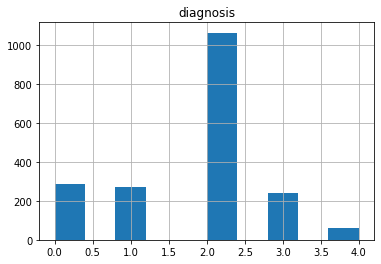

../output/submission/lightgbm-1202_14-10-24-5-fold_avg_logits_test.csv


In [59]:
b3_test_avg_feats = np.average(b3_test_logits_list, axis=0)
b4_test_avg_feats = np.average(b4_test_logits_list, axis=0)
b5_test_avg_feats = np.average(b5_test_logits_list, axis=0)


X_test = np.concatenate([b3_test_avg_feats, b4_test_avg_feats, b5_test_avg_feats], axis=1)
y_pred = gbm.predict(X_test)

y_pred = np.round(y_pred)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

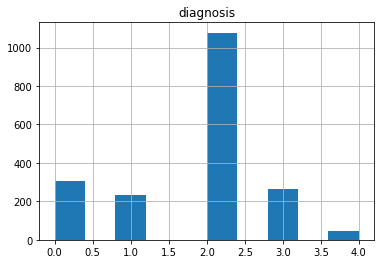

../output/submission/lightgbm-1202_14-10-24-5-fold_logits_avg_test.csv


In [60]:
# 5 test feature then avg

results = []
for b3, b4, b5 in zip(b3_test_logits_list, b4_test_logits_list, b5_test_logits_list):
    X_test = np.concatenate([b3, b4, b5], axis=1)
    res = gbm.predict(X_test)
    results.append(res)

avg_res_gbm = np.average(results, axis=0)
np.save("../output/submission/{}-5-fold_logits_avg_test_logits.npy".format(model_save_name), avg_res_gbm)
y_pred = np.round(avg_res_gbm)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_logits_avg_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

## XGBoost 

In [61]:
model_save_name = "xgboost-{}".format(current_time)

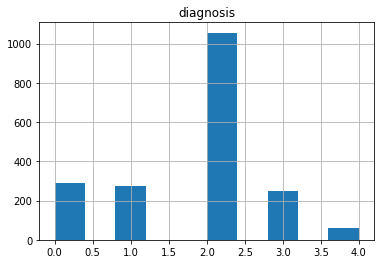

../output/submission/xgboost-1202_14-10-24-5-fold_avg_logits_test.csv


In [62]:
b3_test_avg_feats = np.average(b3_test_logits_list, axis=0)
b4_test_avg_feats = np.average(b4_test_logits_list, axis=0)
b5_test_avg_feats = np.average(b5_test_logits_list, axis=0)


X_test = np.concatenate([b3_test_avg_feats, b4_test_avg_feats, b5_test_avg_feats], axis=1)
y_pred = xlf.predict(X_test)

y_pred = np.round(y_pred)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

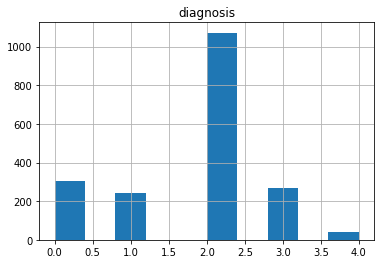

../output/submission/xgboost-1202_14-10-24-5-fold_logits_avg_test.csv


In [63]:
# 5 test feature then avg
results = []
for b3, b4, b5 in zip(b3_test_logits_list, b4_test_logits_list, b5_test_logits_list):
    X_test = np.concatenate([b3, b4, b5], axis=1)
    res = xlf.predict(X_test)
    results.append(res)

avg_res_xlf = np.average(results, axis=0)
np.save("../output/submission/{}-5-fold_logits_avg_test_logits.npy".format(model_save_name), avg_res_xlf)
y_pred = np.round(avg_res_xlf)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_logits_avg_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

## SVR 

In [64]:
model_save_name = "svr-{}".format(current_time)

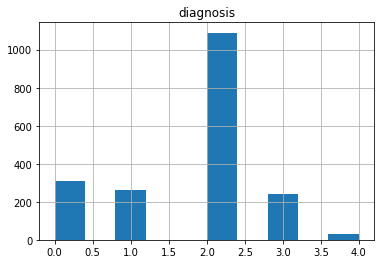

../output/submission/svr-1202_14-10-24-5-fold_avg_logits_test.csv


In [65]:
b3_test_avg_feats = np.average(b3_test_logits_list, axis=0)
b4_test_avg_feats = np.average(b4_test_logits_list, axis=0)
b5_test_avg_feats = np.average(b5_test_logits_list, axis=0)


X_test = np.concatenate([b3_test_avg_feats, b4_test_avg_feats, b5_test_avg_feats], axis=1)
y_pred = svr.predict(X_test)

y_pred = np.round(y_pred)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

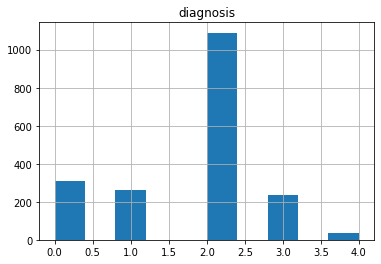

../output/submission/svr-1202_14-10-24-5-fold_logits_avg_test.csv


In [66]:
# 5 test feature then avg

results = []
for b3, b4, b5 in zip(b3_test_logits_list, b4_test_logits_list, b5_test_logits_list):
    X_test = np.concatenate([b3, b4, b5], axis=1)
    res = svr.predict(X_test)
    results.append(res)

avg_res_svr = np.average(results, axis=0)
np.save("../output/submission/{}-5-fold_logits_avg_test_logits.npy".format(model_save_name), avg_res_svr)
y_pred = np.round(avg_res_svr)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_logits_avg_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

## CatBoost

In [67]:
model_save_name = "cb-{}".format(current_time)

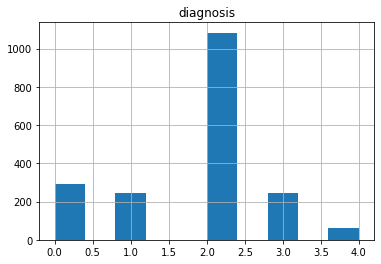

../output/submission/cb-1202_14-10-24-5-fold_avg_logits_test.csv


In [68]:
b3_test_avg_feats = np.average(b3_test_logits_list, axis=0)
b4_test_avg_feats = np.average(b4_test_logits_list, axis=0)
b5_test_avg_feats = np.average(b5_test_logits_list, axis=0)


X_test = np.concatenate([b3_test_avg_feats, b4_test_avg_feats, b5_test_avg_feats], axis=1)
y_pred = cb.predict(X_test)

y_pred = np.round(y_pred)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_avg_logits_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

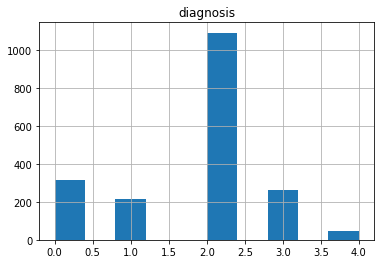

../output/submission/cb-1202_14-10-24-5-fold_logits_avg_test.csv


In [69]:
# 5 test feature then avg

results = []
for b3, b4, b5 in zip(b3_test_logits_list, b4_test_logits_list, b5_test_logits_list):
    X_test = np.concatenate([b3, b4, b5], axis=1)
    res = cb.predict(X_test)
    results.append(res)

avg_res_svr = np.average(results, axis=0)
np.save("../output/submission/{}-5-fold_logits_avg_test_logits.npy".format(model_save_name), avg_res_svr)
y_pred = np.round(avg_res_svr)

test_df.diagnosis = y_pred.astype(int)

test_df.hist()
plt.show()

submition_filename = "../output/submission/{}-5-fold_logits_avg_test.csv".format(model_save_name)
test_df.to_csv(submition_filename, index=False)
print(submition_filename)

# Correlation Analysis

In [70]:
np.corrcoef([avg_res_gbm, avg_res_xlf, avg_res_svr])
#原 array([[1.      , 0.998509, 0.997369],
#        [0.998509, 1.      , 0.997143],
#        [0.997369, 0.997143, 1.      ]])

array([[1.      , 0.999499, 0.998656],
       [0.999499, 1.      , 0.998737],
       [0.998656, 0.998737, 1.      ]])